#### NAME : Hitakshi Harshal Patil
#### TITLE : Diabetes Prediction
#### PROBLEM STATEMENT : Diabetes is a chronic disease that affects millions worldwide. Early detection is crucial for effective treatment and prevention of complications. The PIMA Indians Diabetes Dataset contains medical predictor variables (such as glucose level, BMI, age, etc.) and a binary outcome variable indicating whether a patient has diabetes.
#### OBJECTIVE : Build machine learning models to predict whether a patient has diabetes (Outcome = 1) or not (Outcome = 0) using Logistic Regression and K‑Nearest Neighbors (KNN), and evaluate their performance using a confusion matrix and other metrics.


### 1. Import Libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### 2. Load Dataset

In [2]:
# Load the PIMA Indians Diabetes Dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 3. Inspection

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 4. Exploratory Data Analysis(EDA)
####      Plot distribution of Outcome to see if dataset is imbalanced.


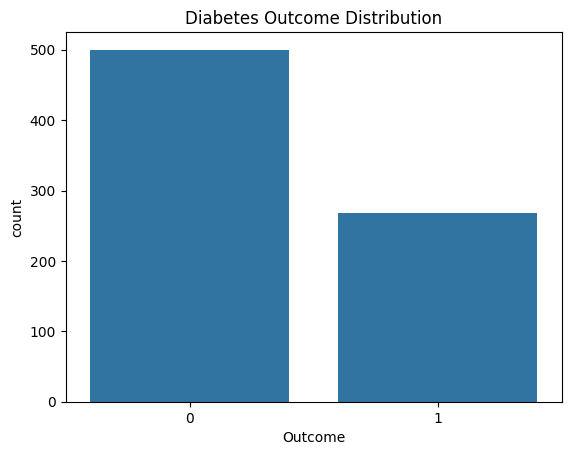

In [7]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


#### Correlation heatmap: Identify which features strongly influence diabetes (e.g., Glucose, BMI).


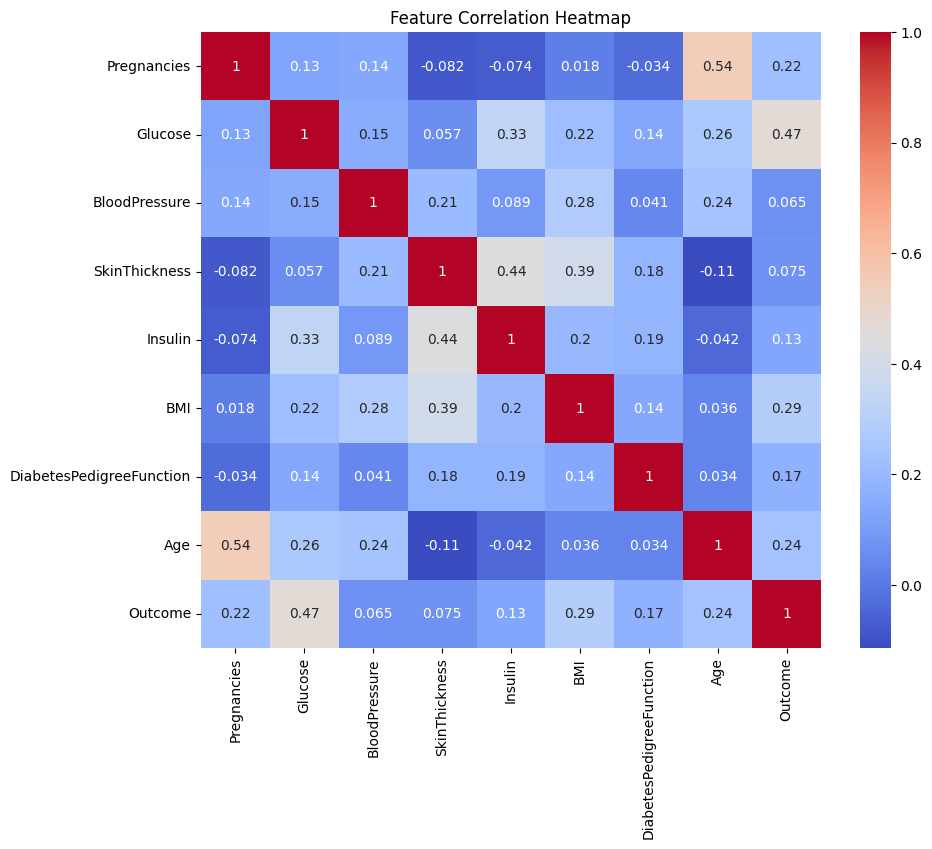

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


### 5. Data Preprocessing
#### Feature-target split: Separate predictors (X) and target (y).


In [9]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


#### Train-test split: Divide dataset into training (70%) and testing (30%) sets.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


#### Scaling: Standardize features using StandardScaler. This is crucial for KNN because it relies on distance calculations.


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 6. Logistic Regression Model
#### Estimates probability of diabetes using a sigmoid function.
#### Fit model on training data.

In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#### Prediction: Classify test data based on probability threshold (default = 0.5).


In [13]:
y_pred_lr = log_reg.predict(X_test)



#### Evaluation: Generate confusion matrix, classification report (precision, recall, F1‑score), and accuracy.


In [14]:
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results:
[[130  20]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

Accuracy: 0.7445887445887446


### 7. K-Nearest Neighbors(KNN)
#### Classifies based on majority vote among k nearest neighbors.


In [15]:
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_)



Best K: {'n_neighbors': np.int64(18)}


#### Use GridSearchCV to find best k (usually between 1–20).
#### Fit model with optimal k.



In [16]:
knn_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=np.int64(18))

#### Classify test data.

In [17]:
y_pred_knn = knn_best.predict(X_test)


#### Evaluation: Same metrics as Logistic Regression.


In [18]:
print("KNN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Results:
[[136  14]
 [ 49  32]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       150
           1       0.70      0.40      0.50        81

    accuracy                           0.73       231
   macro avg       0.72      0.65      0.66       231
weighted avg       0.72      0.73      0.70       231

Accuracy: 0.7272727272727273


### 8. Confusion Matrix Visualization
#### Plot confusion matrices for both models.
#### Helps visualize True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN).
#### In medical prediction, False Negatives (FN) are critical because missing a diabetes case can be dangerous.


In [19]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


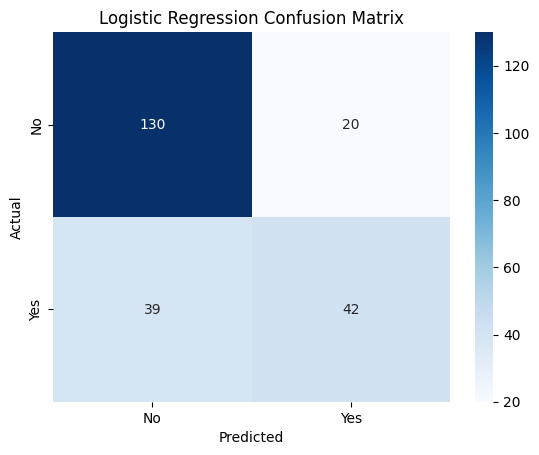

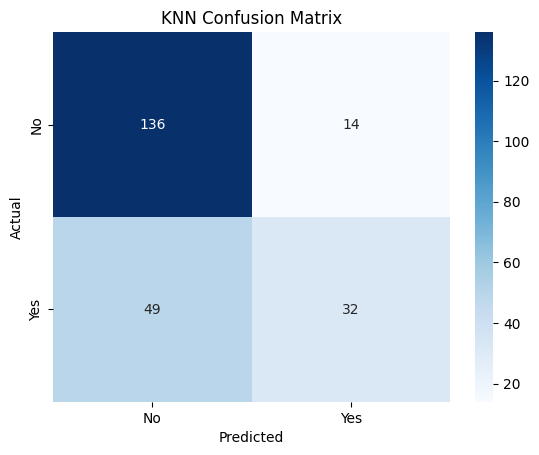

In [20]:
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")


### 9. Compare Models
#### Compare accuracy, precision, recall, and F1‑score of both models.
#### Logistic Regression often performs well due to linear relationships in medical data.
#### KNN may capture non‑linear patterns but is sensitive to scaling and choice of k.


In [21]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Model Comparison:")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"KNN Accuracy: {acc_knn:.4f}")

if acc_lr > acc_knn:
    print("Logistic Regression performed better.")
else:
    print("KNN performed better.")


Model Comparison:
Logistic Regression Accuracy: 0.7446
KNN Accuracy: 0.7273
Logistic Regression performed better.


### Final Outcome
#### A complete Kaggle notebook that predicts diabetes using two algorithms.
#### Clear evaluation with confusion matrices and performance metrics.
#### Insight into which model is more reliable for this dataset.
